In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dependencies
import gym
import gym_anytrading

from gym_anytrading.envs import StocksEnv

In [3]:
# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

In [4]:
# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
import tensorflow
print(tensorflow.__version__)

2.8.1


In [6]:
import quantstats as qs

In [7]:
#loading our dataset
df = pd.read_csv('../../data/binance_BTCUSDT_1d_from_2020_01_01_to_2022_09_30_candlesticks_signals_processed_technical_indicators_and_crypto_index.csv')
#viewing first 5 columns
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,BBANDS_L,AD,ATR,HT_DC,SAR,ratio_high_open,ratio_low_open,ratio_close_open,time_to_chart_return,crypto_index
0,1588204800000,8778.58,9460.00,8401.00,8620.00,206277.214124,1588291199999,1.839284e+09,1661554,99484.476377,...,6192.709022,1.168421e+06,463.016766,18.492804,6800.295144,1.077623,0.956988,0.981936,-0.018063,981.936694
1,1588291200000,8620.00,9059.18,8613.56,8826.96,91468.815059,1588377599999,8.056401e+08,865960,44763.354481,...,6136.691366,1.164558e+06,461.774140,19.396854,7013.071533,1.050949,0.999253,1.024009,0.024009,1005.512287
2,1588377600000,8825.67,9010.00,8753.00,8972.05,59002.087550,1588463999999,5.238389e+08,637884,30400.353449,...,6099.324009,1.206135e+06,447.147416,19.795999,7208.825810,1.020886,0.991766,1.016586,0.016437,1022.040036
3,1588464000000,8972.58,9200.00,8712.00,8894.16,90126.065643,1588550399999,8.084271e+08,877460,44321.370400,...,6121.726289,1.183293e+06,450.065457,20.743438,7388.919745,1.025346,0.970958,0.991260,-0.008681,1013.167293
4,1588550400000,8894.15,8950.00,8522.00,8871.96,84418.512331,1588636799999,7.383438e+08,848802,39118.380222,...,6172.267355,1.236926e+06,448.489353,22.126233,7554.606166,1.006279,0.958158,0.997505,-0.002496,1010.638407


In [8]:
df.columns

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volumne', 'number_of_trades',
       'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore',
       'formatted_open_time', 'formatted_close_time', 'upper_shadow',
       'lower_shadow', 'real_body', 'CDLINVERTEDHAMMER', 'CDLHAMMER',
       'CDLPIERCING', 'CDLMORNINGSTAR', 'CDLSHOOTINGSTAR', 'CDLHANGINGMAN',
       'CDLDARKCLOUDCOVER', 'CDLEVENINGSTAR', 'CDLENGULFING',
       'CDLENGULFINGBULLISH', 'CDLENGULFINGBEARISH', 'CDLINVERTEDHAMMER_NEW',
       'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW',
       'CDLENGULFINGBULLISH_NEW', 'CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW',
       'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW',
       'CDLENGULFINGBEARISH_NEW', 'MA5', 'MA10', 'MA20', 'MA60', 'MA120',
       'volume_MA5', 'volume_MA10', 'volume_MA20', 'SMA5', 'SMA10', 'SMA20',
       'SMA60', 'SMA120', 'volume_SMA5', 'volume_SMA10', 'volume_SMA20',
       'WMA5', 'W

In [9]:
#converting Date Column to DateTime Type
df['Date'] = pd.to_datetime(df['formatted_open_time'])
df.dtypes

open_time                        int64
open                           float64
high                           float64
low                            float64
close                          float64
                             ...      
ratio_low_open                 float64
ratio_close_open               float64
time_to_chart_return           float64
crypto_index                   float64
Date                    datetime64[ns]
Length: 91, dtype: object

In [10]:
#setting the column as index
df.set_index('Date', inplace=True)
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,BBANDS_L,AD,ATR,HT_DC,SAR,ratio_high_open,ratio_low_open,ratio_close_open,time_to_chart_return,crypto_index
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-30,1588204800000,8778.58,9460.00,8401.00,8620.00,206277.214124,1588291199999,1.839284e+09,1661554,99484.476377,...,6192.709022,1.168421e+06,463.016766,18.492804,6800.295144,1.077623,0.956988,0.981936,-0.018063,981.936694
2020-05-01,1588291200000,8620.00,9059.18,8613.56,8826.96,91468.815059,1588377599999,8.056401e+08,865960,44763.354481,...,6136.691366,1.164558e+06,461.774140,19.396854,7013.071533,1.050949,0.999253,1.024009,0.024009,1005.512287
2020-05-02,1588377600000,8825.67,9010.00,8753.00,8972.05,59002.087550,1588463999999,5.238389e+08,637884,30400.353449,...,6099.324009,1.206135e+06,447.147416,19.795999,7208.825810,1.020886,0.991766,1.016586,0.016437,1022.040036
2020-05-03,1588464000000,8972.58,9200.00,8712.00,8894.16,90126.065643,1588550399999,8.084271e+08,877460,44321.370400,...,6121.726289,1.183293e+06,450.065457,20.743438,7388.919745,1.025346,0.970958,0.991260,-0.008681,1013.167293
2020-05-04,1588550400000,8894.15,8950.00,8522.00,8871.96,84418.512331,1588636799999,7.383438e+08,848802,39118.380222,...,6172.267355,1.236926e+06,448.489353,22.126233,7554.606166,1.006279,0.958158,0.997505,-0.002496,1010.638407


In [11]:
#df_selected_columns = df[['close', 'volume', 'CCI_14', 'ADX_14', 'ADXR_14', 'MACD_12_26_9', 'RSI_14']]
df_selected_columns = df

In [12]:
df_selected_columns

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,BBANDS_L,AD,ATR,HT_DC,SAR,ratio_high_open,ratio_low_open,ratio_close_open,time_to_chart_return,crypto_index
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-30,1588204800000,8778.58,9460.00,8401.00,8620.00,206277.214124,1588291199999,1.839284e+09,1661554,99484.476377,...,6192.709022,1.168421e+06,463.016766,18.492804,6800.295144,1.077623,0.956988,0.981936,-0.018063,981.936694
2020-05-01,1588291200000,8620.00,9059.18,8613.56,8826.96,91468.815059,1588377599999,8.056401e+08,865960,44763.354481,...,6136.691366,1.164558e+06,461.774140,19.396854,7013.071533,1.050949,0.999253,1.024009,0.024009,1005.512287
2020-05-02,1588377600000,8825.67,9010.00,8753.00,8972.05,59002.087550,1588463999999,5.238389e+08,637884,30400.353449,...,6099.324009,1.206135e+06,447.147416,19.795999,7208.825810,1.020886,0.991766,1.016586,0.016437,1022.040036
2020-05-03,1588464000000,8972.58,9200.00,8712.00,8894.16,90126.065643,1588550399999,8.084271e+08,877460,44321.370400,...,6121.726289,1.183293e+06,450.065457,20.743438,7388.919745,1.025346,0.970958,0.991260,-0.008681,1013.167293
2020-05-04,1588550400000,8894.15,8950.00,8522.00,8871.96,84418.512331,1588636799999,7.383438e+08,848802,39118.380222,...,6172.267355,1.236926e+06,448.489353,22.126233,7554.606166,1.006279,0.958158,0.997505,-0.002496,1010.638407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,1664150400000,18809.13,19318.96,18680.72,19227.82,439239.219430,1664236799999,8.356952e+09,5837041,220623.299140,...,17753.575357,7.014713e+06,944.341597,19.308893,20588.001306,1.027105,0.993173,1.022260,0.022355,2190.313457
2022-09-27,1664236800000,19226.68,20385.86,18816.32,19079.13,593260.741610,1664323199999,1.170577e+10,8152473,296727.710590,...,17728.957726,6.620128e+06,988.998626,18.844067,20391.039601,1.060290,0.978657,0.992326,-0.007733,2173.375618
2022-09-28,1664323200000,19078.10,19790.00,18471.28,19412.82,521385.455470,1664409599999,9.964460e+09,7357437,260944.381180,...,17738.074709,6.843261e+06,1012.550152,18.537319,20385.860000,1.037315,0.968193,1.017545,0.017490,2211.387504


In [13]:
window_size = 5
start_date_id = int(df_selected_columns.index.get_loc('2021-01-06 00:00:00'))
mid_date_id = int(df_selected_columns.index.get_loc('2022-03-30 00:00:00'))
end_date_id = int(df_selected_columns.index.get_loc('2022-09-30 00:00:00'))

In [14]:
print(f'start_date_id:{start_date_id}')
print(f'mid_date_id:{mid_date_id}')
print(f'end_date_id:{end_date_id}')

start_date_id:251
mid_date_id:699
end_date_id:883


In [15]:
print(f'mid_date_id - start_date_id: {mid_date_id - start_date_id}')
print(f'end_date_id - mid_date_id: {end_date_id - mid_date_id}')
print(f'end_date_id - start_date_id: {end_date_id - start_date_id}')

mid_date_id - start_date_id: 448
end_date_id - mid_date_id: 184
end_date_id - start_date_id: 632


In [16]:
df_selected_columns.shape

(884, 90)

In [17]:
def my_process_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'close'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['volume', 'CCI_14', 'ADX_14', 'ADXR_14', 'MACD_12_26_9', 'RSI_14']].to_numpy()[start:end]
    return prices, signal_features


class MyEnv(StocksEnv):
    _process_data = my_process_data

In [18]:
#passing the data and creating our environment
env = MyEnv(df=df_selected_columns, frame_bound=(start_date_id,mid_date_id), window_size=window_size)

info {'total_reward': -11167.530000000017, 'total_profit': 0.7457818926125946, 'position': 1}


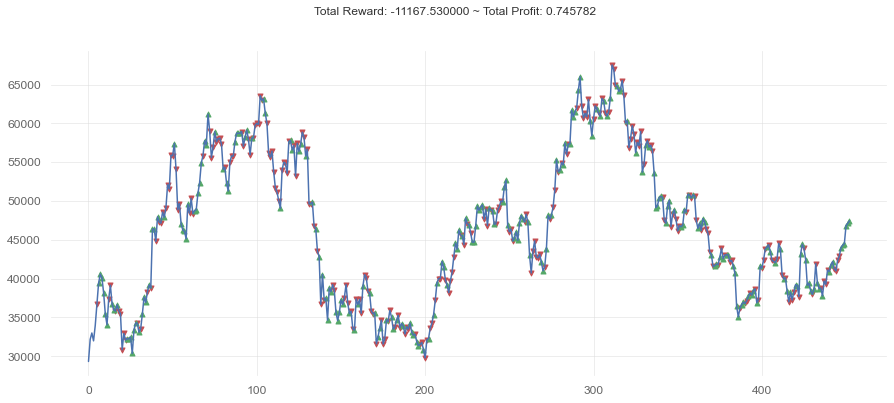

In [19]:
#running the test environment
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [20]:
#setting up our environment for training 
env_maker = lambda: MyEnv(df=df_selected_columns, frame_bound=(start_date_id,mid_date_id), window_size=window_size)
env = DummyVecEnv([env_maker])

#Applying the Trading RL Algorithm
model = A2C('MlpPolicy', env, verbose=1) 
 
#setting the learning timesteps
#model.learn(total_timesteps=1000)
model.learn(total_timesteps=(mid_date_id - start_date_id))

Using cpu device


In [21]:
#Setting up the Agent Environment
env = MyEnv(df=df_selected_columns, frame_bound=(mid_date_id,end_date_id), window_size=window_size)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -20463.999999999996, 'total_profit': 0.4397480259254228, 'position': 1}


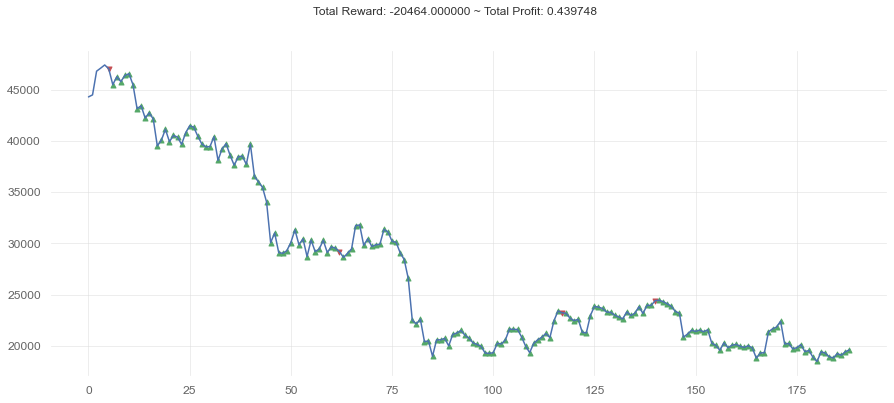

In [22]:
#Plotting our Model for Trained Trades
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [23]:
len(env.history['total_profit'])

183

                           Strategy
-------------------------  ----------
Start Period               2022-04-01
End Period                 2022-09-29
Risk-Free Rate             0.0%
Time in Market             3.0%

Cumulative Return          -56.03%
CAGR﹪                     -80.92%

Sharpe                     -1.8
Prob. Sharpe Ratio         0.2%
Smart Sharpe               -1.78
Sortino                    -1.8
Smart Sortino              -1.79
Sortino/√2                 -1.28
Smart Sortino/√2           -1.26
Omega                      0.07

Max Drawdown               -56.03%
Longest DD Days            126
Volatility (ann.)          53.26%
Calmar                     -1.44
Skew                       -8.59
Kurtosis                   79.98

Expected Daily %           -0.45%
Expected Monthly %         -12.8%
Expected Yearly %          -56.03%
Kelly Criterion            -319.85%
Risk of Ruin               0.0%
Daily Value-at-Risk        -5.9%
Expected Shortfall (cVaR)  -5.9%

Max Consecutive 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-05-26,2022-09-29,2022-09-29,126,-56.025197,-45.139254


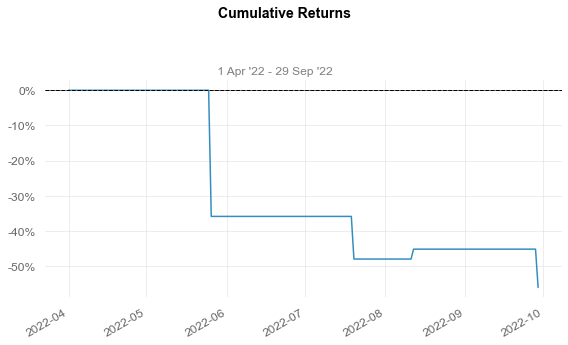

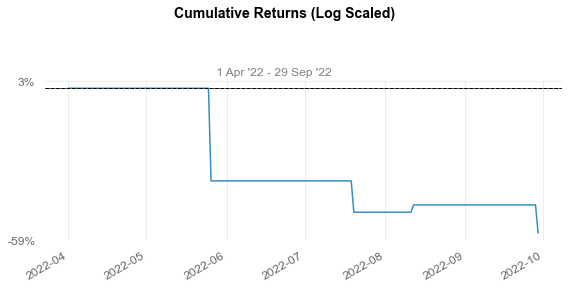

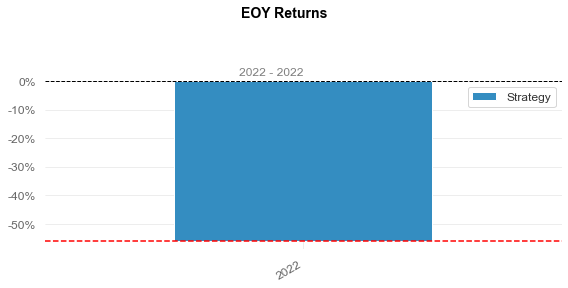

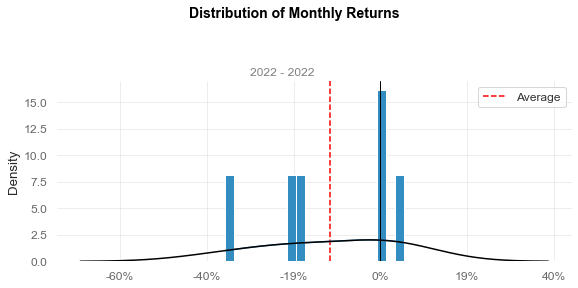

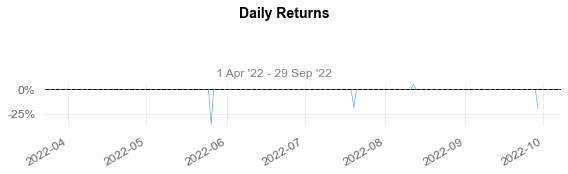

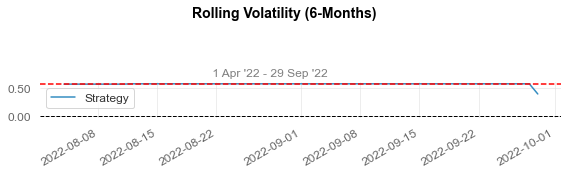

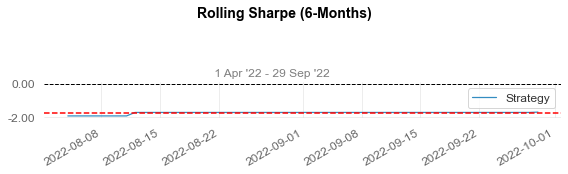

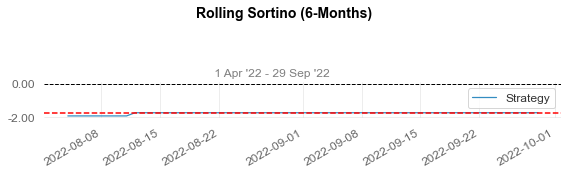

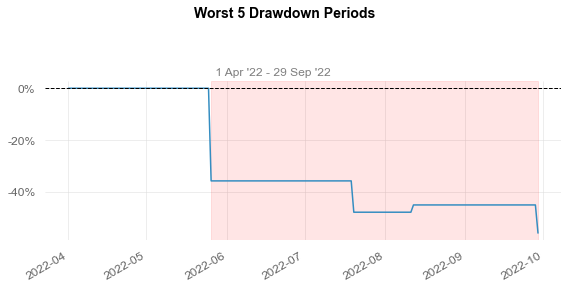

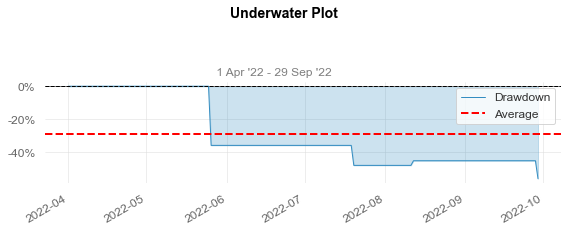

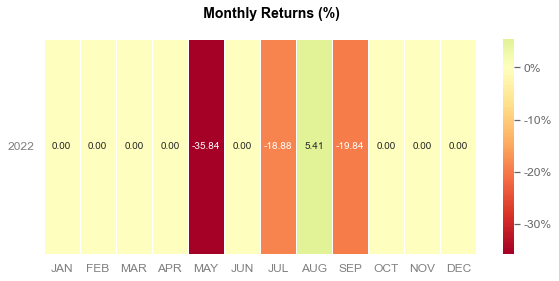

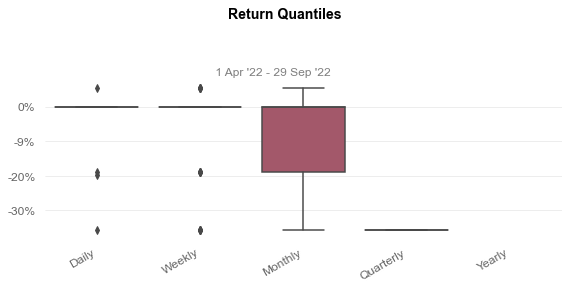

In [24]:
qs.extend_pandas()

start_index = mid_date_id
end_index = end_date_id

net_worth = pd.Series(env.history['total_profit'], index=df_selected_columns.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='a2c_quantstats.html')